## Check spot detection

Overlay detected spots on the original image.

### Setup

In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

import fishtank as ft

### Check FOV 

In [225]:
image_path = Path("/lab/weissman_imaging/puzheng/PE_LT/20241111-F320-3-4-1016-1103_ingelT7/")
spots_path = Path("/lab/weissman_imaging/4T1/241103_F320-3-4_MF4++/spots/")
series = "H0R1"
fov = 30

Overlay z slice

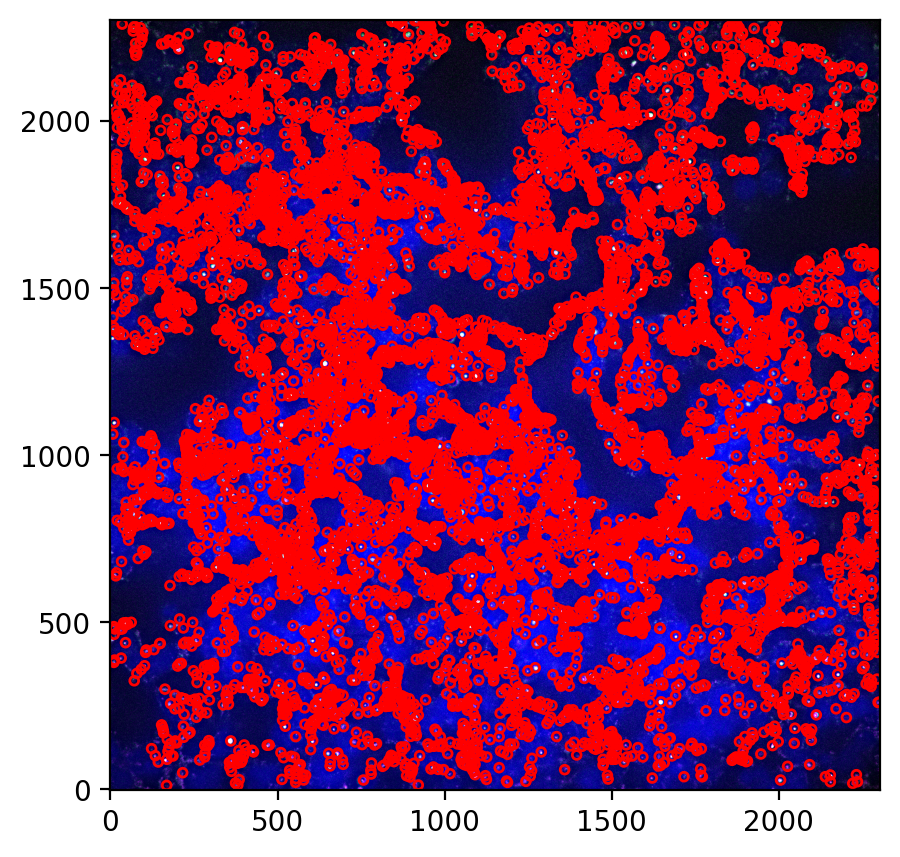

In [226]:
z = 20
# Load spots
spots = pd.read_csv(spots_path / f"spots_{fov}.csv")
# Load image
img, attr = ft.io.read_fov(image_path, fov, series, z_slices=z, colors=[748, 637, 405])
img[:2] = ft.filters.unsharp_mask(img[:2], sigma=10)
# Plot image with spots
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
ft.pl.imshow(img, ax=ax, vmax="p99")
layer_spots = spots.query("@z -5 < z < @z +5")
ax.scatter(layer_spots.x, layer_spots.y, s=10, edgecolor="r", facecolor="none")